In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 100
df = pd.DataFrame({
    'Lead_ID': range(1, n + 1),
    'Source': np.random.choice(['Website', 'Referral', 'Social Media', 'Email Campaign'], n),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], n),
    'Follow_Ups': np.random.randint(1, 6, n),
    'Stage': np.random.choice(['Contacted', 'Qualified', 'Proposal', 'Closed'], n),
    'Time_to_Close_Days': np.random.choice([np.nan, *range(5, 21)], n),
    'Converted': np.random.choice([0, 1], n, p=[0.7, 0.3])
})

df.head()

,Lead_ID,Source,Region,Follow_Ups,Stage,Time_to_Close_Days,Converted
0,1,Social Media,East,1,Contacted,NaN,1
1,2,Email Campaign,South,4,Contacted,18.0,0
2,3,Website,South,5,Qualified,NaN,0
3,4,Social Media,West,4,Proposal,8.0,0
4,5,Social Media,South,5,Proposal,19.0,0


C:\Users\Mrudhul kv\AppData\Local\Temp\ipykernel_2996\25467312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='Blues_d')


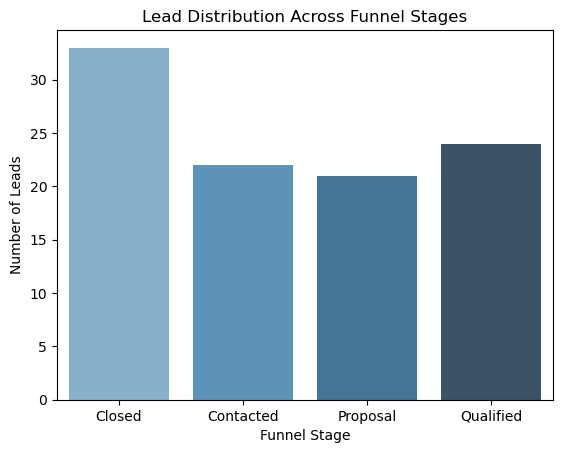

In [3]:
# Funnel stage distribution
import seaborn as sns
import matplotlib.pyplot as plt

stage_counts = df['Stage'].value_counts().sort_index()

sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='Blues_d')
plt.title('Lead Distribution Across Funnel Stages')
plt.xlabel('Funnel Stage')
plt.ylabel('Number of Leads')
plt.show()

C:\Users\Mrudhul kv\AppData\Local\Temp\ipykernel_2996\1894652497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_by_source.index, y=conversion_by_source.values, palette='Greens_d')


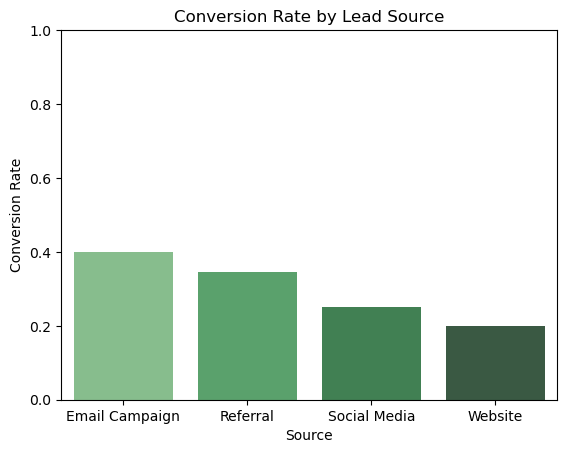

In [5]:
# Conversion rate by source
conversion_by_source = df.groupby('Source')['Converted'].mean().sort_values(ascending=False)

sns.barplot(x=conversion_by_source.index, y=conversion_by_source.values, palette='Greens_d')
plt.title('Conversion Rate by Lead Source')
plt.ylabel('Conversion Rate')
plt.xlabel('Source')
plt.ylim(0, 1)
plt.show()

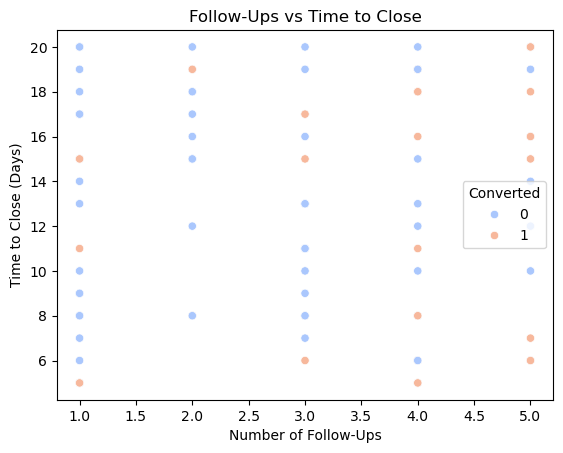

In [7]:
# Time to close vs follow-ups
sns.scatterplot(data=df, x='Follow_Ups', y='Time_to_Close_Days', hue='Converted', palette='coolwarm')
plt.title('Follow-Ups vs Time to Close')
plt.xlabel('Number of Follow-Ups')
plt.ylabel('Time to Close (Days)')
plt.show()

C:\Users\Mrudhul kv\AppData\Local\Temp\ipykernel_2996\3146520439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_by_region.index, y=conversion_by_region.values, palette='Purples_d')


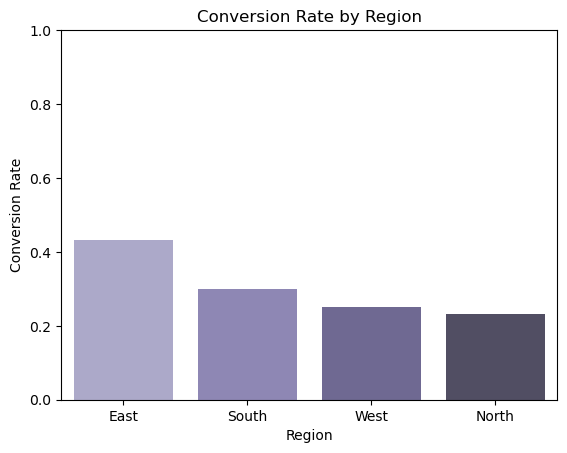

In [11]:
#Conversion rate by region
conversion_by_region = df.groupby('Region')['Converted'].mean().sort_values(ascending=False)

sns.barplot(x=conversion_by_region.index, y=conversion_by_region.values, palette='Purples_d')
plt.title('Conversion Rate by Region')
plt.ylabel('Conversion Rate')
plt.xlabel('Region')
plt.ylim(0, 1)
plt.show()

In [13]:
# Predictive Modelling 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Select features and target
features = df[['Source', 'Region', 'Follow_Ups']]
target = df['Converted']

# One-hot encode categorical features
encoded_features = pd.get_dummies(features, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=42)

In [15]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.60


C:\Users\Mrudhul kv\AppData\Local\Temp\ipykernel_2996\564378553.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


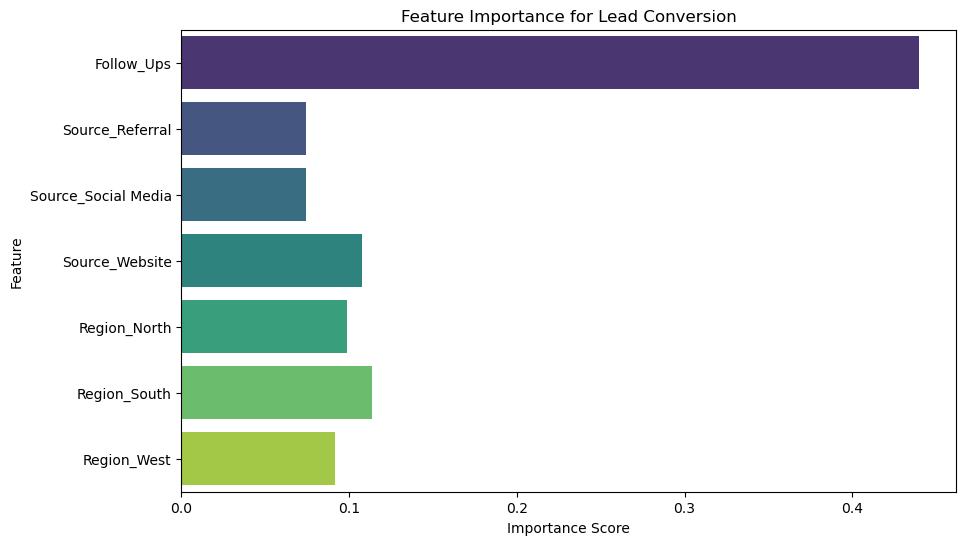

In [17]:
# Feature Importance
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = encoded_features.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance for Lead Conversion')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [19]:
## 5. Insights & Recommendations

- Leads from **Referral** sources had the highest conversion rate (~X%).
- **Follow-ups** positively influenced conversion, especially when >3.
- **Region-wise**, South and East showed stronger performance.
- Leads that converted typically closed within **7–10 days**.
- Recommendation: Prioritize referral leads with 3+ follow-ups and focus outreach in high-performing regions.

SyntaxError: invalid character '–' (U+2013) (3697352172.py, line 6)

In [ ]:
## 6. Conclusion

This project demonstrates how data-driven insights can optimize sales funnel performance. By analyzing lead behavior and predicting conversion likelihood, businesses can focus efforts where they matter most. The FunnelScope dashboard blends analytics, visualization, and machine learning to support smarter decision-making.

Next Steps:
- Integrate real-time data from CRM
- Build an interactive dashboard with Plotly or Dash
- Expand model with deal size, product category, and client type